# Trabajo Final de Finanzas Computacionales

• Carolina Rincón Páez
• Johann Efren Barón
• Juan José Vargas

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp
!pip install --quiet yfinance
import yfinance as yf
!pip install --quiet fitter
from fitter import Fitter, get_common_distributions, get_distributions
import statsmodels.api as sm
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [113]:
data=pd.read_excel("/content/Data.xlsx")
data

,Fecha,Petroleo Colombiano,TRM,Brent,WTI
0,2010-01-01,1204788,1982.29,71.459999,72.889999
1,2010-02-01,1187707,1932.32,77.589996,79.660004
2,2010-03-01,1260767,1928.59,82.699997,83.760002
3,2010-04-01,1496446,1969.75,87.440002,86.150002
4,2010-05-01,1282923,1971.55,74.019997,73.970001
...,...,...,...,...,...
118,2021-07-01,998031,3867.88,76.330002,73.949997
119,2021-09-01,1274603,3834.68,78.519997,75.029999
120,2021-10-01,1292227,3784.44,84.379997,83.570000
121,2021-11-01,1423127,4010.98,70.570000,66.180000


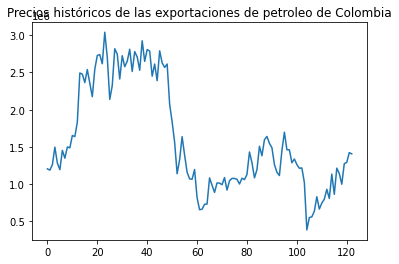

In [114]:
#Valor de las Exportaciones de petroleo de Colombia
Petro = data["Petroleo Colombiano"]
Petro = pd.DataFrame(Petro)
retornos_Petro = np.log(Petro/Petro.shift(1)).dropna()
mu_Petro = retornos_Petro.mean()
sigma_Petro = retornos_Petro.std()
plt.plot(Petro)
plt.title("Precios históricos de las exportaciones de petroleo de Colombia")
plt.show()

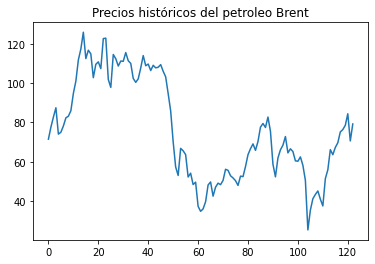

In [115]:
#Historico de precios del petroleo Brent
Brent = data["Brent"]
Brent = pd.DataFrame(Brent)
retornos_Brent = np.log(Brent/Brent.shift(1)).dropna()
mu_Brent = retornos_Brent.mean()
sigma_Brent = retornos_Brent.std()
plt.plot(Brent)
plt.title("Precios históricos del petroleo Brent")
plt.show()

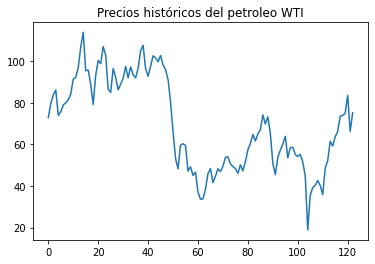

In [116]:
#Historico de precios del petroleo WTI
WTI = data["WTI"]
WTI = pd.DataFrame(WTI)
retornos_WTI = np.log(WTI/WTI.shift(1)).dropna()
mu_WTI = retornos_WTI.mean()
sigma_WTI = retornos_WTI.std()
plt.plot(WTI)
plt.title("Precios históricos del petroleo WTI")
plt.show()

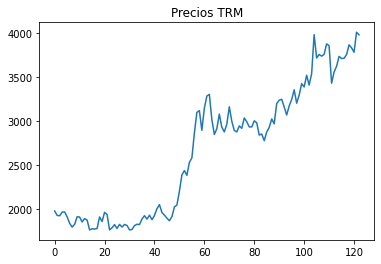

In [117]:
TRM=data["TRM"]
plt.plot(TRM)
plt.title("Precios TRM")
plt.show()

In [118]:
#Petroleo Colombiano
PPetro = adfuller(Petro)
print("ADF test: %f" % PPetro[0])
print("P-value: %f" % PPetro[1])
print("Citical values:")
for key, value in PPetro[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -1.312071
P-value: 0.623632
Citical values:
	1%: -3.486056
	5%: -2.885943
	10%: -2.579785


In [119]:
#Petroleo Brent
PBrent = adfuller(Brent)
print("ADF test: %f" % PBrent[0])
print("P-value: %f" % PBrent[1])
print("Citical values:")
for key, value in PBrent[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -1.511588
P-value: 0.527771
Citical values:
	1%: -3.485122
	5%: -2.885538
	10%: -2.579569


In [120]:
#Petroleo WTI
PWTI = adfuller(WTI)
print("ADF test: %f" % PWTI[0])
print("P-value: %f" % PWTI[1])
print("Citical values:")
for key, value in PWTI[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -1.755092
P-value: 0.402974
Citical values:
	1%: -3.485122
	5%: -2.885538
	10%: -2.579569


Se llega a la conclusión de que las variables no son estacionarias debido a que por medio de la prueba de Dickey-Fuller el P-value da mayor a 0.05

In [123]:
y = data["Petroleo Colombiano"]
x = data[['Brent', 'WTI', 'TRM']]
x = sm.add_constant(x)
aux = sm.OLS(y,x).fit()
print(aux.summary())

                             OLS Regression Results                            
Dep. Variable:     Petroleo Colombiano   R-squared:                       0.878
Model:                             OLS   Adj. R-squared:                  0.875
Method:                  Least Squares   F-statistic:                     286.8
Date:                 Mon, 21 Nov 2022   Prob (F-statistic):           2.81e-54
Time:                         06:32:08   Log-Likelihood:                -1701.7
No. Observations:                  123   AIC:                             3411.
Df Residuals:                      119   BIC:                             3423.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.318e+05   2.37e+05      1.82

Teniendo en cuenta la regresión lineal anteriormente realizada se puede decir que el precio del petroleo Brent y el petroleo WTI ejercen una gran participación en el nivel de exportaciones que tiene el Estado Colombiano, por lo cual el más minimo cambio en el precio afecta directamente los ingresos.

In [132]:
activo = ["BZ=F"]
PBrent = yf.download(activo,start="2010-01-01",end="2021-12-31",interval="1Mo")['Adj Close'].dropna()
retornos_PBrent = np.log(PBrent/PBrent.shift(1)).dropna()
mu_PBrent = retornos_PBrent.mean()
sigma_PBrent = retornos_PBrent.std()

[*********************100%***********************]  1 of 1 completed


In [134]:
activo = ["CL=F"]
PWTI = yf.download(activo,start="2010-01-01",end="2021-12-31",interval="1Mo")['Adj Close'].dropna()
retornos_PWTI = np.log(PWTI/PWTI.shift(1)).dropna()
mu_PWTI = retornos_PWTI.mean()
sigma_PWTI = retornos_PWTI.std()

[*********************100%***********************]  1 of 1 completed


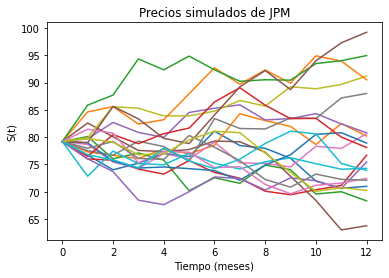

In [133]:
def Paths(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    St = S
    return St

S0 = PBrent[-1]
T = 1 
M = 12
NS = 1000
StP = Paths(S0,mu_PBrent,sigma_PBrent,T,NS,M)

plt.plot(np.transpose(StP[0:20,:]))
plt.xlabel("Tiempo (meses)")
plt.title("Precios simulados del Petroleo Brent")
plt.ylabel("S(t)")
plt.show()

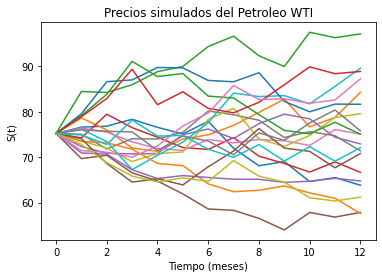

In [135]:
def Paths(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    St = S
    return St

S0 = PWTI[-1]
T = 1 
M = 12
NS = 1000
StW = Paths(S0,mu_PWTI,sigma_PWTI,T,NS,M)

plt.plot(np.transpose(StW[0:20,:]))
plt.xlabel("Tiempo (meses)")
plt.title("Precios simulados del Petroleo WTI")
plt.ylabel("S(t)")
plt.show()